## This file merged our three submetrics for the main metric.

### Introduction
The project have the main matrix Safty, and it have three different submetrics to measure and analyze the best neighborhood in Pittsburgh. We think the safety and the greenery area are the most important thing of live in a neighborhood, so the three submetrices we used are Arrest Rates, natural environment conditions and firearm seizures. We think those three metrics are having the same weight, which means the three metrics are the same important. After each of us got best neighborhood in the each of metric, we combined those data set together and get the best neighborhood from those three submatrices.<br>

### My metric
Our metric is the arrest rate, firearm seizure and greenery area rate at each unit area for each neighborhood. We used three datasets: Pittsburgh Police Arrest Data, Firearm Seizures Data and Pittsburgh neighborhood natural environment conditions.<br>

### The best neighborhood
After apply my metric, the best neighborhood we came up with is Regent Square. It only has 2 arrest count between these years therefore based on my metric, it is the safest place to live in. I also came up with a visualization bar graph that shows a low arrest rate, a low firearm seizure rate and a high natural environment cover rate compared to other neighborhood.<br>

### Conclusion
<ul>
    <li>Tinglu: My personal favorite neighborhood is oakland since I live here and it is where our college at. However, we always receive crime alerts so it is actually not as safe as I hope. By collecting data, merging data and anaylizing data, I came up with the neighborhood with the lowest arrest count. Therefore based on my metric, Mt. Oliver Neighborhood is the best neighborhood.</li>
    <li>JOJO: I use the Firearm Seizures Dataset. my measure is that the lowest total number of firearm seizures in a neighborhood between 2015 and 2022 means that the smaller this safety hazard is, the greater it is anyway.</li>
    <li>Xinge: My result is that Regent Square have largest total greenery area according to the data(in percentage of the neighborhood's land area), so Regent Square is the neighborhoods have best natural environment conditions, and it is the best neighborhood in my data metrix. Compare to my best neighborhood, which is Squirrel Hill, Regent Square is located in the suburbs, which have advantage in greenery area, Squirrel Hill is located at urban area and don't have advantage on greenery area.</li>
</ul>

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Import three submetrics files from each group members

In [12]:
# read the arrest csv files
arrest_df = pd.read_csv("arrest_data.csv", sep=',', engine='python')
arrest_df

,Unnamed: 0,neighborhood,incidents_counts
0,0,Central Business District,3324
1,1,South Side Flats,2856
2,2,Carrick,1963
3,3,East Allegheny,1777
4,4,Homewood South,1747
...,...,...,...
93,93,Regent Square,28
94,94,Central Northside,23
95,95,Mt. Oliver Boro,18
96,96,Troy Hill-Herrs Island,6


In [13]:
# read the nature csv files
nature_df = pd.read_csv("NEC_FinalResult.csv", sep=',', engine='python')
nature_df

,Unnamed: 0,neighborhood,Land Area (acres),Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),SumGreenArea
0,65,Regent Square,122.9,0.516,0.000,0.333,0.849
1,35,Glen Hazel,291.8,0.000,0.159,0.646,0.805
2,37,Hays,"1,120.0",0.001,0.000,0.717,0.718
3,60,Perry North,775.7,0.333,0.000,0.376,0.709
4,24,Duquesne Heights,398.7,0.229,0.166,0.295,0.690
...,...,...,...,...,...,...,...
85,41,Homewood South,254.7,0.011,0.000,0.000,0.011
86,21,Chateau,245.1,0.006,0.000,0.000,0.006
87,43,Knoxville,193.3,0.000,0.000,0.005,0.005
88,10,Bluff,209.3,0.000,0.000,0.000,0.000


In [14]:
# read the firearm csv files
firearm_df = pd.read_csv("TheFirearmS.csv", sep=',', engine='python')
firearm_df

,neighborhood,Firearm_Seizures
0,Homewood South,311
1,South Side Flats,176
2,Homewood North,152
3,East Liberty,142
4,Carrick,139
...,...,...
83,Oakwood,4
84,Summer Hill,3
85,Swisshelm Park,3
86,Mt. Oliver,3


### Merge these three csv to make a dataframe

In [15]:
# merge the arrest csv files and the firearm csv files to crime dataframe
crime_df = pd.merge(arrest_df, firearm_df, how='inner', on=['neighborhood', 'neighborhood'])
crime_df

,Unnamed: 0,neighborhood,incidents_counts,Firearm_Seizures
0,0,Central Business District,3324,112
1,1,South Side Flats,2856,176
2,2,Carrick,1963,139
3,3,East Allegheny,1777,49
4,4,Homewood South,1747,311
...,...,...,...,...
81,88,St. Clair,42,7
82,89,Chartiers City,35,4
83,91,Swisshelm Park,33,3
84,93,Regent Square,28,3


In [16]:
# merge the crime dataframe and the nature csv files
final_df = pd.merge(crime_df, nature_df, how='inner', on=['neighborhood', 'neighborhood'])
final_df

,Unnamed: 0_x,neighborhood,incidents_counts,Firearm_Seizures,Unnamed: 0_y,Land Area (acres),Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),SumGreenArea
0,0,Central Business District,3324,112,16,409.6,0.071,0.0,0.000,0.071
1,1,South Side Flats,2856,176,71,599.0,0.035,0.0,0.002,0.037
2,2,Carrick,1963,139,15,"1,070.7",0.035,0.0,0.120,0.155
3,3,East Allegheny,1777,49,25,151.0,0.001,0.0,0.026,0.027
4,4,Homewood South,1747,311,41,254.7,0.011,0.0,0.000,0.011
...,...,...,...,...,...,...,...,...,...,...
81,88,St. Clair,42,7,77,198.4,0.000,0.0,0.493,0.493
82,89,Chartiers City,35,4,20,84.5,0.002,0.0,0.175,0.177
83,91,Swisshelm Park,33,3,81,307.2,0.119,0.0,0.312,0.431
84,93,Regent Square,28,3,65,122.9,0.516,0.0,0.333,0.849


### Calculate arrest incidents rate and firearm seizures rate in each unit area at neighborhood

In [17]:
# rates instead of counts preventing large neighborhood has larger incidents counts
# ratio between incidents counts and land area is fairer
# convert the arrest incidents counts, the firearm seizures counts and land area from string to float
final_df['incidents_counts'] = pd.to_numeric(final_df['incidents_counts'],errors='coerce')
final_df['Land Area (acres)'] = pd.to_numeric(final_df['Land Area (acres)'],errors='coerce')
final_df['Firearm_Seizures'] = pd.to_numeric(final_df['Firearm_Seizures'],errors='coerce')

# calculate the arrest incidents rate and firearm seizures rate by dividing incidents counts and firearm seizures counts by land area
final_df['incidents_rate'] = final_df['incidents_counts'].div(final_df['Land Area (acres)'])
final_df['firearm_seizures_rate'] = final_df['Firearm_Seizures'].div(final_df['Land Area (acres)'])

final_df

,Unnamed: 0_x,neighborhood,incidents_counts,Firearm_Seizures,Unnamed: 0_y,Land Area (acres),Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),SumGreenArea,incidents_rate,firearm_seizures_rate
0,0,Central Business District,3324,112,16,409.6,0.071,0.0,0.000,0.071,8.115234,0.273438
1,1,South Side Flats,2856,176,71,599.0,0.035,0.0,0.002,0.037,4.767947,0.293823
2,2,Carrick,1963,139,15,NaN,0.035,0.0,0.120,0.155,NaN,NaN
3,3,East Allegheny,1777,49,25,151.0,0.001,0.0,0.026,0.027,11.768212,0.324503
4,4,Homewood South,1747,311,41,254.7,0.011,0.0,0.000,0.011,6.859050,1.221044
...,...,...,...,...,...,...,...,...,...,...,...,...
81,88,St. Clair,42,7,77,198.4,0.000,0.0,0.493,0.493,0.211694,0.035282
82,89,Chartiers City,35,4,20,84.5,0.002,0.0,0.175,0.177,0.414201,0.047337
83,91,Swisshelm Park,33,3,81,307.2,0.119,0.0,0.312,0.431,0.107422,0.009766
84,93,Regent Square,28,3,65,122.9,0.516,0.0,0.333,0.849,0.227828,0.024410


In [18]:
# drop the NaN data and extract the three submetrics forming the final dataframe
final_df = final_df.dropna()
# have the final dataframe containing three submetrics
final_df = final_df[['neighborhood', 'incidents_rate','firearm_seizures_rate', 'SumGreenArea']]
final_df

,neighborhood,incidents_rate,firearm_seizures_rate,SumGreenArea
0,Central Business District,8.115234,0.273438,0.071
1,South Side Flats,4.767947,0.293823,0.037
3,East Allegheny,11.768212,0.324503,0.027
4,Homewood South,6.859050,1.221044,0.011
5,Homewood North,5.946724,0.547156,0.081
...,...,...,...,...
81,St. Clair,0.211694,0.035282,0.493
82,Chartiers City,0.414201,0.047337,0.177
83,Swisshelm Park,0.107422,0.009766,0.431
84,Regent Square,0.227828,0.024410,0.849


This part we choose Swisshelm Park as a base line, because of those three indexes:incidents rate, firearmseizures rate and total green area have different weights, and we want to make those weights the same so we can fairly choose the best neighborhood from those data. The first step we have to do is make all three indexes of Swisshelm Park to 1, which means we have to devide the same number of each column's number to that column. After the weight of three indexes are same, we can just easily calculate the best neighborhood by add the incidents rate and firearm seizures rate together and subtract by the total green area, because the first two indexes are the lower the better, and total green area is the higher the better, and we can sort the result and the smallest number represented the best neighborhood our group got as the result.

### 

In [19]:
final_df.loc[:,'incidents_rate':] = final_df.loc[:,'incidents_rate':].div(final_df.iloc[0]['incidents_rate':])
final_df['sum'] = final_df['incidents_rate'] + final_df['firearm_seizures_rate'] - final_df['SumGreenArea']
final_df = final_df.sort_values(by=['sum'])
final_df

,neighborhood,incidents_rate,firearm_seizures_rate,SumGreenArea,sum
84,Regent Square,0.028074,0.089271,11.957746,-11.840401
73,Glen Hazel,0.057432,0.187996,11.338028,-11.092601
35,Perry North,0.084512,0.1933,9.985915,-9.708104
69,Duquesne Heights,0.051923,0.165108,9.71831,-9.501279
37,Highland Park,0.079965,0.191628,9.014085,-8.742492
...,...,...,...,...,...
8,Bluff,0.721217,0.891134,0.0,1.61235
23,Middle Hill,0.49997,1.629977,0.338028,1.791919
3,East Allegheny,1.450138,1.186755,0.380282,2.256612
10,Knoxville,0.718441,2.024388,0.070423,2.672407


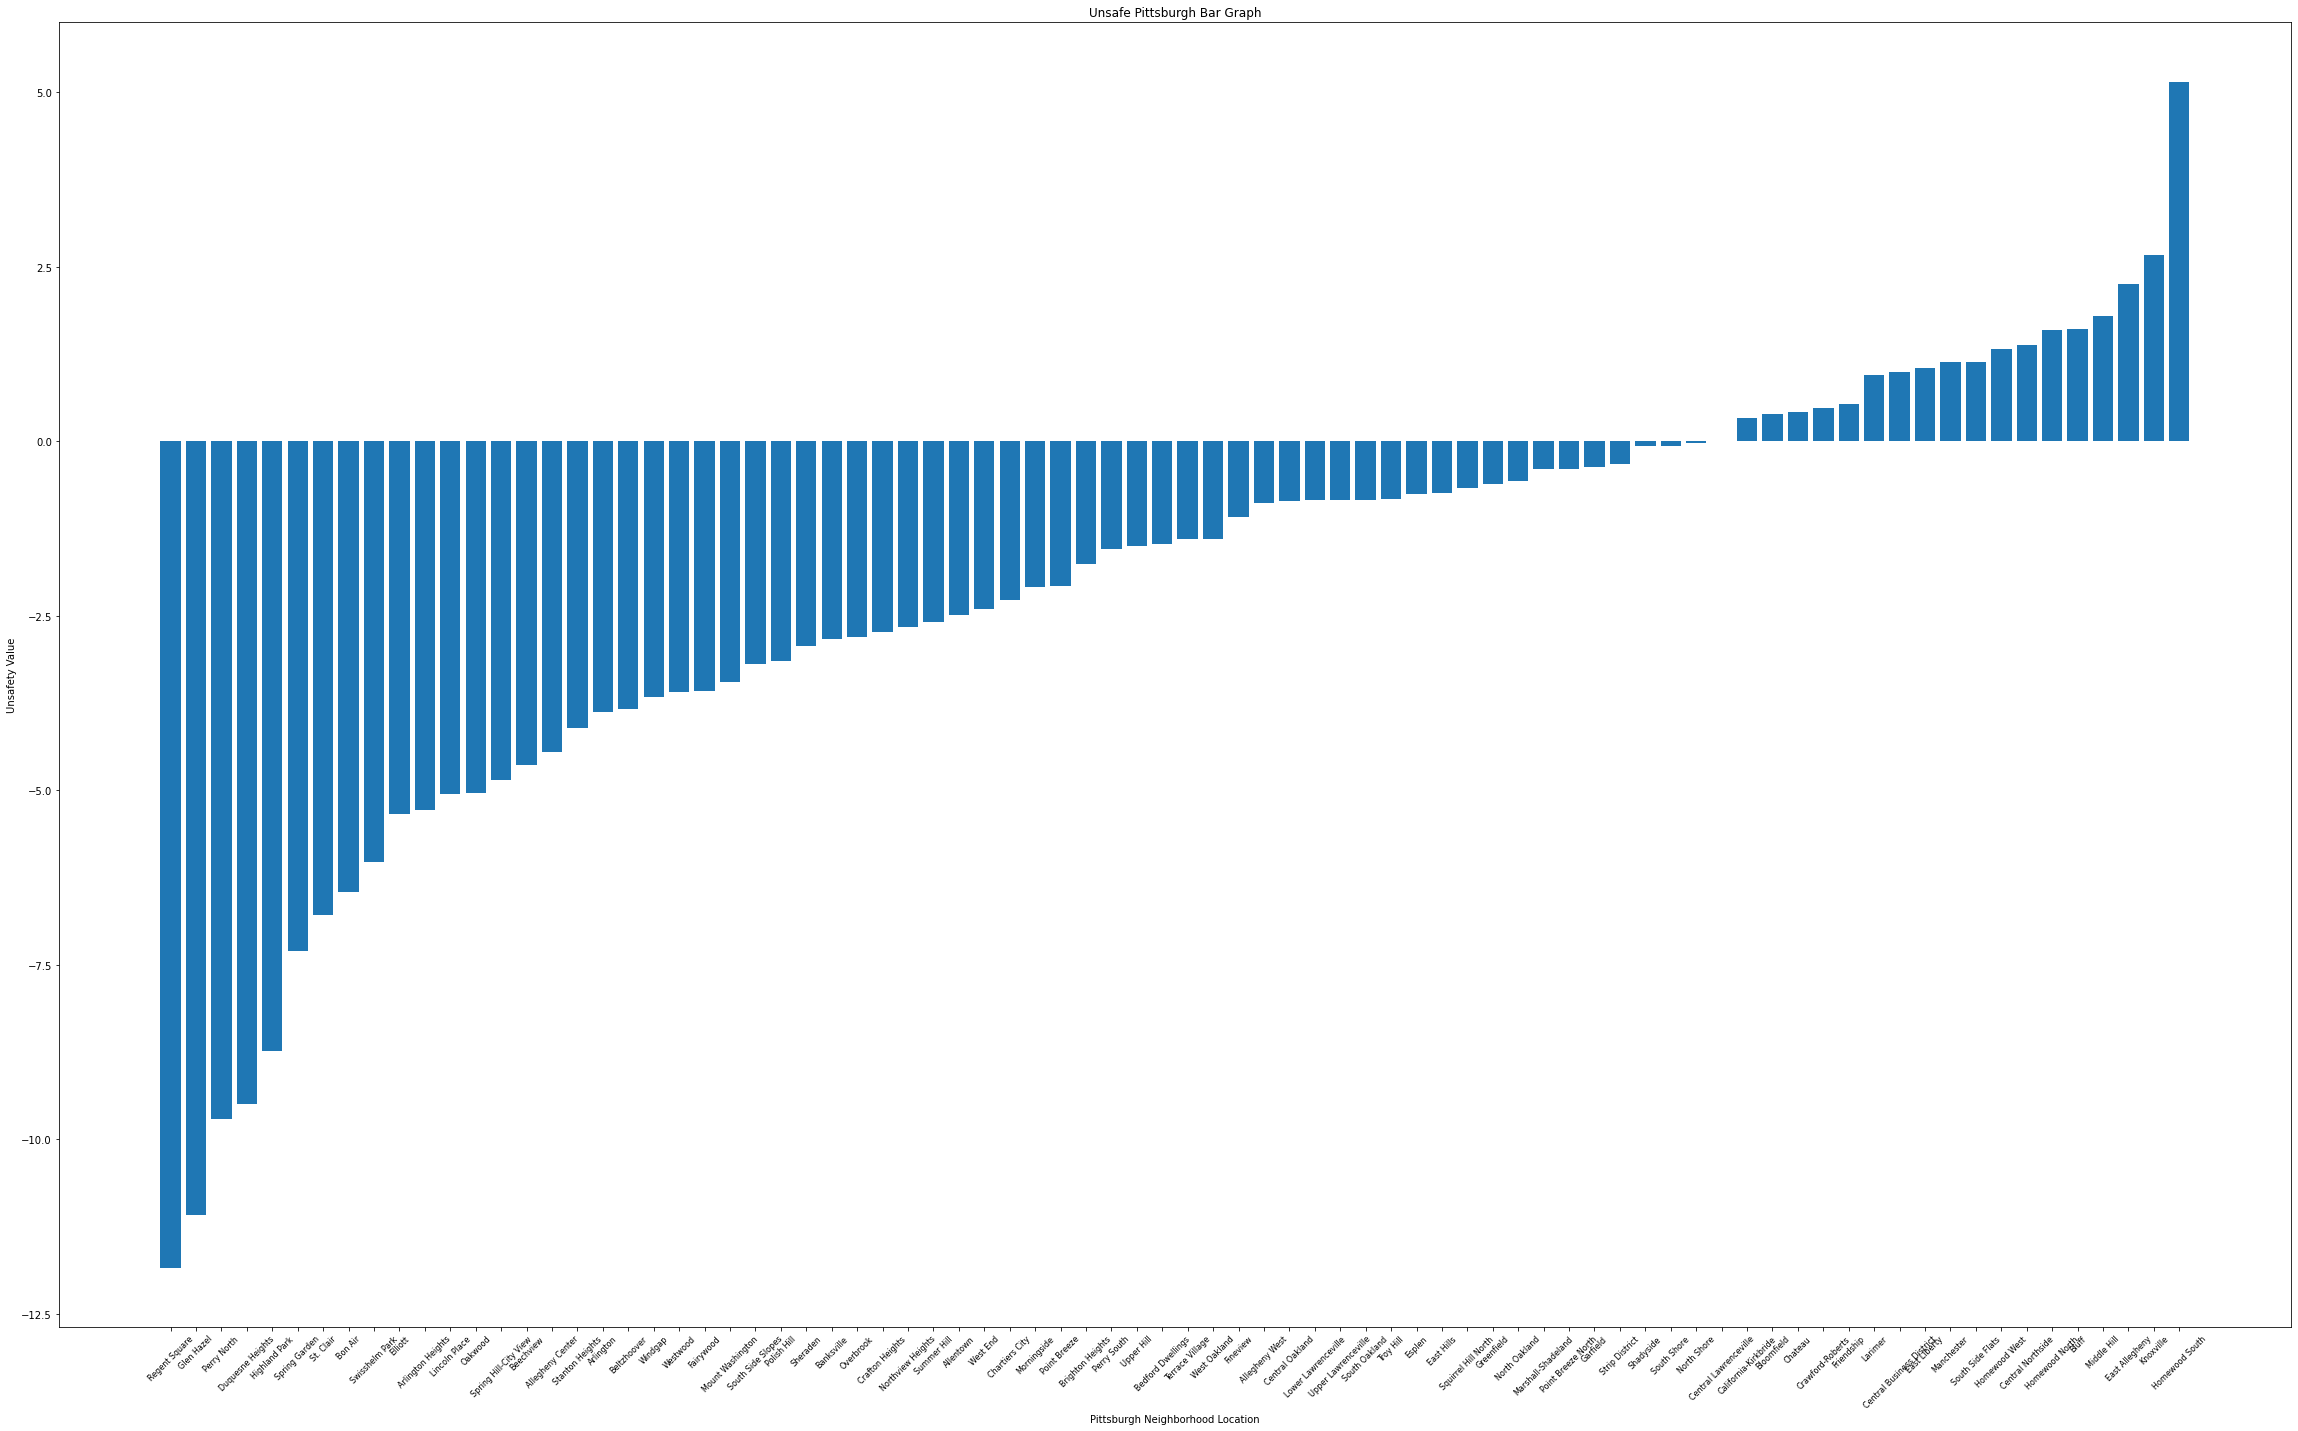

In [20]:
arrest_plt = plt.figure(figsize=(40, 24))
plt.ticklabel_format(style='plain')
plt.bar(range(len(final_df['neighborhood'])),final_df['sum'], align = 'center')

# Formatting graph
plt.xticks(range(len(final_df['neighborhood'])),final_df['neighborhood'], 
           rotation = 45, fontsize = 8)
plt.xlabel('Pittsburgh Neighborhood Location')
plt.ylabel('Unsafety Value')
plt.title('Unsafe Pittsburgh Bar Graph')

# save graph
plt.savefig("final_graph.png")
plt.show()